The quality of the dataset is central to the offline learning performance for combinatorial multi-armed bandit problems. Two primary data coverage conditions are proposed to measure dataset quality and assess the amount of data required for optimal action selection. **Condition 3** (infinity-norm TPM data coverage) ensures that the data collecting distribution provides sufficient data to estimate the mean of the optimal action by controlling the maximum ratio between the triggering probabilities of the optimal action and the data collection distribution. This ratio must remain bounded by a constant $C^*_\infty$, reflecting the uniformity of the data coverage. **Condition 4** (1-norm TPM data coverage) looks at the total data collection for the optimal action, ensuring that the sum of the data collected across all arms in the optimal action remains bounded by a constant $C^*_1$. Both conditions assess how well the dataset captures relevant information for optimal action selection, with the difference that the first focuses on the maximum ratio and the second on the total sum.

The suboptimality gap, which measures how far an action chosen by the algorithm is from the optimal action, is tightly bounded by these coverage conditions. The gap decreases with more data, where the number of required samples depends on the quality of data coverage. The results show that when data coverage is sufficient, the Combinatorial Lower Confidence Bound (CLCB) algorithm can achieve a near-optimal performance, matching theoretical lower bounds up to logarithmic factors.

### Formulas:

* **Infinity-norm TPM Data Coverage (Condition 3)**:

  $$
  \max_{i \in [m]} \frac{p_{D_{\text{arm}}, S^*}^i}{p_{D_{\text{arm}}, D_S}^i} \leq C^*_\infty
  $$

  Where $p_{D_{\text{arm}}, S^*}^i$ is the probability of arm $i$ being triggered by the optimal action $S^*$, and $p_{D_{\text{arm}}, D_S}^i$ is the data collection probability.

* **1-norm TPM Data Coverage (Condition 4)**:

  $$
  \sum_{i \in [m]} \frac{p_{D_{\text{arm}}, S^*}^i}{p_{D_{\text{arm}}, D_S}^i} \leq C^*_1
  $$

  This condition ensures that the total coverage across all arms in the optimal action remains within a bounded range.

### Pseudocode Combinatorial Lower Confidence Bound Algorithm:

```python
def CLCB_algorithm(D, oracle, delta):
    # Input: Dataset D, approximation oracle, probability delta
    for arm i in [m]:
        Ni = sum(1 for t in D if i in t[1])  # Count how many times arm i is triggered
        mu_hat_i = sum(t[2][i] for t in D if i in t[1]) / Ni  # Empirical mean for arm i
        LCB_i = mu_hat_i - sqrt(log(4 * m * n / delta) / (2 * Ni))  # Lower confidence bound for arm i
    # Call the oracle with the calculated LCBs
    S_hat = oracle([LCB_1, LCB_2, ..., LCB_m])
    return S_hat
```

In [17]:
# This example simulates a dataset where we have 5 arms, 
# and each arm's feedback is triggered based on a probabilistic distribution. 
# We'll generate synthetic data and define a simple oracle function 
# that selects the action (super arm) with the lowest lower confidence bound (LCB).

import numpy as np
import random

# Step 1: Generate a synthetic dataset
# Parameters for the synthetic example
num_arms = 15  # Number of arms
num_samples = 100  # Number of data points in the dataset
delta = 0.05  # Confidence level (probability of error)

# Simulate a dataset with probabilistic feedback
def generate_synthetic_data(num_arms, num_samples):
    dataset = []
    for _ in range(num_samples):
        # Randomly pick a subset of arms to be triggered (simulating probabilistic feedback)
        triggered_arms = random.sample(range(num_arms), random.randint(1, num_arms))
        feedback = [random.uniform(0, 1) for _ in range(num_arms)]  # Random feedback for each arm
        dataset.append((triggered_arms, feedback))
    return dataset

# Step 2: Define the oracle function (for simplicity, select the action with the lowest LCB)
def oracle(LCBs):
    return np.argmin(LCBs)  # Return the index of the arm with the lowest LCB

# Step 3: Implement the CLCB algorithm
def CLCB_algorithm(dataset, oracle, delta):
    num_arms = len(dataset[0][1])  # Number of arms (from the dataset)
    num_samples = len(dataset)  # Number of samples in the dataset
    LCBs = []
    
    # For each arm, calculate the lower confidence bound
    for i in range(num_arms):
        Ni = sum(1 for t in dataset if i in t[0])  # Count how many times arm i is triggered
        if Ni == 0:
            mu_hat_i = 0  # If the arm was never triggered, set empirical mean to 0
        else:
            mu_hat_i = sum(t[1][i] for t in dataset if i in t[0]) / Ni  # Empirical mean for arm i
        LCB_i = mu_hat_i - np.sqrt(np.log(4 * num_arms * num_samples / delta) / (2 * Ni))  # Lower confidence bound for arm i
        LCBs.append(LCB_i)
    
    # Call the oracle to select the arm with the lowest LCB
    selected_arm = oracle(LCBs)
    return selected_arm, LCBs

# Step 4: Run the example with synthetic data and print the results
dataset = generate_synthetic_data(num_arms, num_samples)
selected_arm, LCBs = CLCB_algorithm(dataset, oracle, delta)

# Print results
print("LCBs for each arm:", LCBs)
print("Selected arm:", selected_arm+1)

LCBs for each arm: [0.25551920996192784, 0.20689416080723544, 0.18299276098795464, 0.16782348260345048, 0.19231380754019667, 0.22148698221126029, 0.17173681461955925, 0.16979803972694152, 0.14156836323341337, 0.1420166322132544, 0.1865972137322932, 0.17169639072358134, 0.19619490226481073, 0.15633764500678904, 0.17811112434460263]
Selected arm: 9


### Explanation:

1. **Synthetic Data Generation (`generate_synthetic_data`)**:
   * We generate `num_samples` of data, each containing a randomly selected subset of arms that are triggered, along with random feedback for each arm. This simulates a real-world environment where not all arms are triggered in every round.

2. **Oracle (`oracle`)**:
   * A simple oracle that selects the arm with the lowest LCB (pessimistic reward estimate).

3. **CLCB Algorithm (`CLCB_algorithm`)**:
   * For each arm, we calculate the empirical mean based on how often it was triggered and compute the LCB for that arm.
   * The algorithm returns the arm with the lowest LCB.

### Output:

* **LCBs for each arm**: The calculated lower confidence bounds for all 5 arms.
* **Selected arm**: The index of the arm chosen by the oracle, in this case, arm 9 (indexing starts from 1).

Note: In the future, we might modify `num_arms`, `num_samples` and other parameters to test different, more difficulte and complex scenarios.

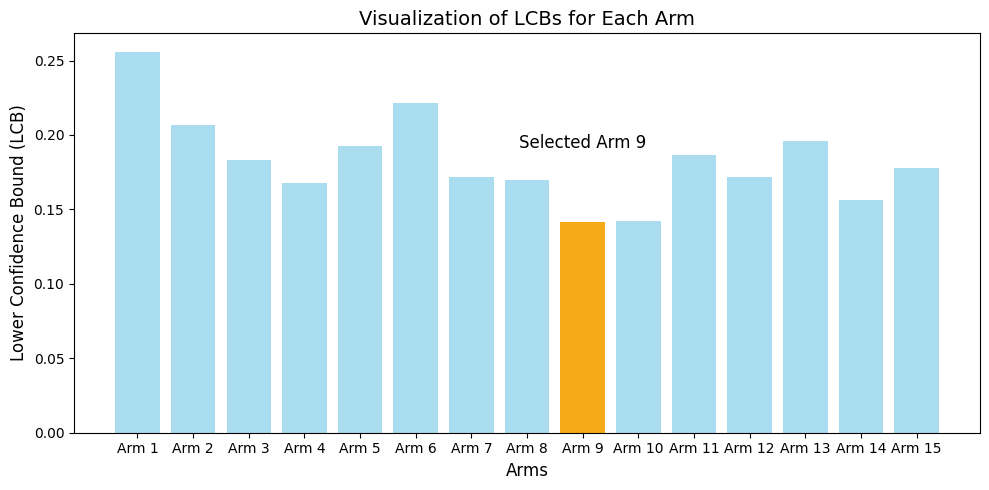

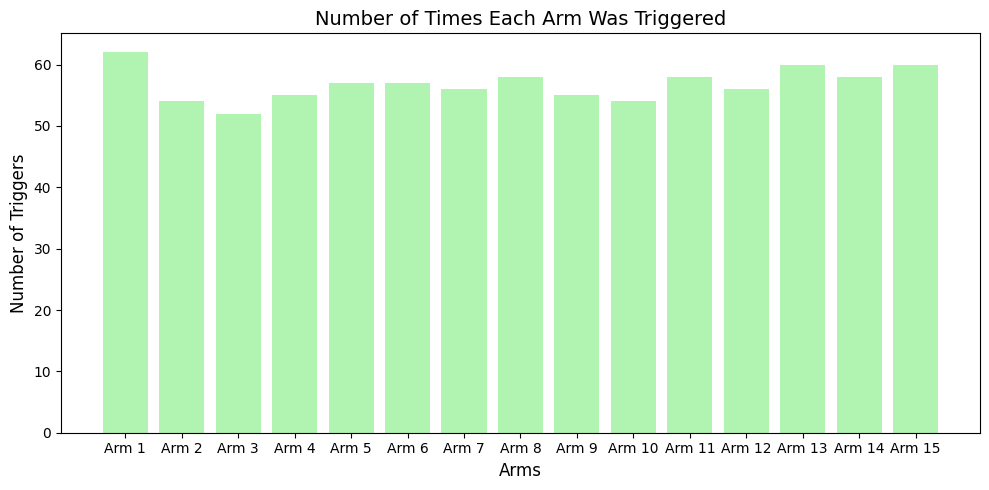

In [18]:
import matplotlib.pyplot as plt

# Step 5: Visualization
# Plotting LCBs
fig, ax = plt.subplots(figsize=(10, 5))

# Bar chart for LCBs
ax.bar(range(num_arms), LCBs, color='skyblue', alpha=0.7)

# Highlight the selected arm
ax.bar(selected_arm, LCBs[selected_arm], color='orange', alpha=0.9)

# Adding labels and title
ax.set_xlabel('Arms', fontsize=12)
ax.set_ylabel('Lower Confidence Bound (LCB)', fontsize=12)
ax.set_title('Visualization of LCBs for Each Arm', fontsize=14)
ax.set_xticks(range(num_arms))
ax.set_xticklabels([f'Arm {i+1}' for i in range(num_arms)])

# Show selected arm text
ax.text(selected_arm, LCBs[selected_arm] + 0.05, f'Selected Arm {selected_arm+1}', ha='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()

# Step 6: Plot the number of times each arm was triggered
arm_trigger_counts = [sum(1 for t in dataset if i in t[0]) for i in range(num_arms)]

# Plotting trigger counts
fig, ax2 = plt.subplots(figsize=(10, 5))
ax2.bar(range(num_arms), arm_trigger_counts, color='lightgreen', alpha=0.7)
ax2.set_xlabel('Arms', fontsize=12)
ax2.set_ylabel('Number of Triggers', fontsize=12)
ax2.set_title('Number of Times Each Arm Was Triggered', fontsize=14)
ax2.set_xticks(range(num_arms))
ax2.set_xticklabels([f'Arm {i+1}' for i in range(num_arms)])

plt.tight_layout()
plt.show()